<div class="alert alert-block alert-info">

__10/10__  Elizabeth



# Donovan Feist

# CH EN 3603

# Homework 10

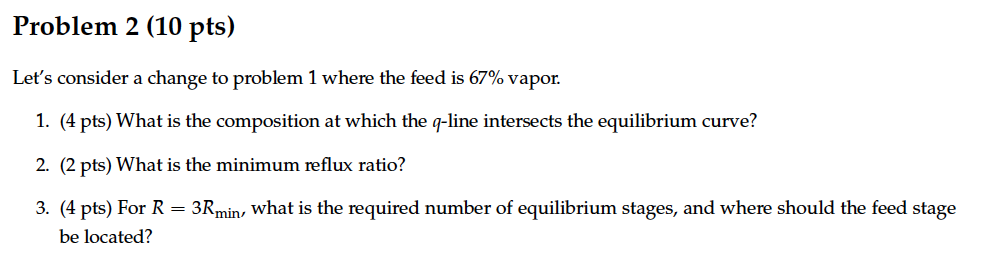

## part 1 solution

The mass feed rate must first be converted into a molar feed rate.

### $F(\frac{kg}{hr})=F_{benzene} (\frac{kg}{hr})+F_{toluene} (\frac{kg}{hr}) \Rightarrow$

### $F(\frac{kg}{hr})=F_{benzene} (\frac{mol}{hr})MW_{benzene} (\frac{g}{mol})(\frac{1\space kg}{1000 \space g})+F_{toluene} (\frac{mol}{hr})MW_{toluene} (\frac{g}{mol})(\frac{1\space kg}{1000 \space g})$

### $\frac{F_{benzene}(mol/hr)}{F_{benzene}(mol/hr)+F_{toluene}(mol/hr)}=z_F \Rightarrow$

### $F_{benzene}(mol/hr)=\frac{z_F F_{toluene}(mol/hr)}{1-z_F} \Rightarrow$

### $F(kg/hr)=\frac{z_F F_{toluene}(mol/hr)}{1-z_F}MW_{benzene}(g/mol)(\frac{1 \space kg}{1000 \space g})+F_{toluene}(mol/hr)MW_{toluene}(g/mol)(\frac{1\space kg}{1000 \space g}) \Rightarrow$

### $F_{toluene}(mol/hr)=\frac{F(kg/hr)(\frac{1000 \space g}{1 \space kg})}{(\frac{z_F}{1-z_F})MW_{benzene}(g/mol)+MW_{toluene}(g/mol)}$

### $F_{total}(mol/hr)=F_{benzene}(mol/hr)+F_{toluene}(mol/hr)$

In [1]:
z=0.55 #mole fraction of benzene in the feed
F=45 #kg/hr
MW_benzene=78.11 #g/mol
MW_toluene=92.14 #g/mol

F_tol=F*1000/(z/(1-z)*MW_benzene+MW_toluene)
print('F_toluene=',F_tol,'mol/hr')

F_ben=z*F_tol/(1-z)
print('F_benzene=',F_ben,'mol/hr')

F_total=F_tol+F_ben
print('F_total=',F_total,'mol/hr')

F_toluene= 239.86212369778553 mol/hr
F_benzene= 293.164817852849 mol/hr
F_total= 533.0269415506345 mol/hr


The q value can now be calculated with the equation

### $q=\frac{L_F}{F}$

where $L_F$ and $F$ are the molar flow rates of the liquid in the feed and the total feed, respectively.

In [2]:
#calculating q value
pv=67 #mole percent of feed that is vapor
q=1-pv/100
print('q=',q)

q= 0.32999999999999996


The q line can now be plotted using the equation

### $y=\left(\frac{q}{q-1} \right)x-\frac{z_F}{q-1}$

x_equilibrium= [0.4060029]
y_equilibrium= [0.62092395]
True Slope of q Line= -0.49253731343283574
Calculated Slope of q Line= [-0.49253731]


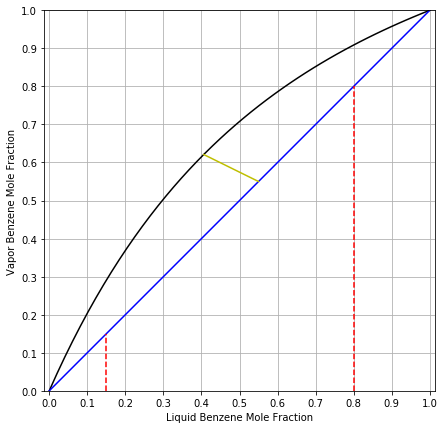

In [4]:
x_D=0.80 #mole fraction of benzene in distillate
x_B=1-0.85 #mole fraction of benzene in bottoms

import numpy as np
from scipy.optimize import fsolve

#defining vertical lines
uD=np.linspace(0,x_D)
pD=x_D*np.ones(len(uD))
uB=np.linspace(0,x_B)
pB=x_B*np.ones(len(uB))

import pandas as pd
data=pd.read_csv('Txy.csv')
Teq=data['T'].values
xeq=data['x'].values
yeq=data['y'].values

#q-line data points
trueslope=q/(q-1)
def func(x2):
    x1=z
    y1=z
    y2=np.interp(x2,xeq,yeq)
    r=trueslope-(y2-y1)/(x2-x1)
    return r
sol=fsolve(func,0.45)
print('x_equilibrium=',sol)
y2=np.interp(sol,xeq,yeq)
print('y_equilibrium=',y2)
xs=[z,sol]
ys=[z,y2]
calculated_slope=(ys[1]-ys[0])/(xs[1]-xs[0])
print('True Slope of q Line=',trueslope)
print('Calculated Slope of q Line=',calculated_slope)

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting q-line
plt.plot(xs,ys,'y-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

The q-line intersects the equilibrium curve at a composition of $\boxed{(x_{eq},\space \space y_{eq})=(0.406, \space \space 0.621)}$

## part 2 solution

$R_{min}=\frac{(L/V)_{min}}{1-(L/V)_{min}}$

where $(L/V)_{min}$ is the slope of the rectifying line. This is determined by pushing the q-line all the way to the equilibrium curve, then connecting that intersection point to the point on the y=x line that corresponds to to $x_D$. The q-line has already been pushed to the equilibrium curve in part 1, so all that's left is to plot the rectifying line, determine its slope, then determine $R_{min}$.

L/V_min= [0.45451109]


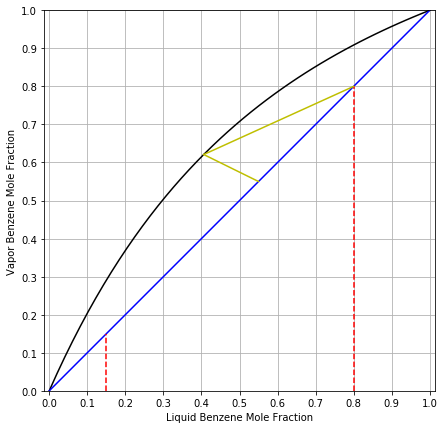

In [5]:
#rectifying line data points
xs_r=[sol,x_D]
ys_r=[y2,x_D]

#calculating slope of rectifying line
LoV=(ys_r[1]-ys_r[0])/(xs_r[1]-xs_r[0])
print('L/V_min=',LoV)

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting q-line
plt.plot(xs,ys,'y-')
#plotting rectifying line
plt.plot(xs_r,ys_r,'y-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

In [6]:
Rmin=LoV/(1-LoV)
print('R_min=',Rmin)

R_min= [0.83321784]


The minimum reflux ratio is $\boxed{R_{min}=0.833}$.

## part 3 solution

When $R=3R_{min}$

In [7]:
R=3*Rmin
print('R=',R)

R= [2.49965351]


The value for R is used to calculate $\frac{L}{V}$ with the equation

### $\frac{L}{V}=\frac{R}{R+1}$

In [8]:
LoV3=R/(R+1)
print('L/V=',LoV3)

L/V= [0.71425743]


$\frac{L}{V}$ is the slope of the rectifying line. The point where the rectifying line, q-line, and stripping line intersect can now be determined. Once determine, the required number of equilibrium stages can be found.

The intersection point of the three lines is found by utilizing the equations for the q-line and rectifying line. Because we have two equations and two unkowns, the intersection point can be found by setting the y values of these lines equal to each other.

### $rectifying \space line: \space y-y_1=\frac{L}{V}(x-x_1)$

### $q-line: \space y=\frac{q}{q-1}x-\frac{z_F}{q-1} \Rightarrow$

## $x_i=\frac{\frac{z_F}{q-1}-\frac{L}{V}x_1}{\frac{q}{q-1}-\frac{L}{V}} \Rightarrow$

### $y_i=\frac{L}{V}(x_i-x_1)+y_1$

where $(x_1,y_1)$ is the coordinate of the right end of the rectifying line.

x_i= [0.49080547]
y_i= [0.57915551]
x_B= 0.10889998685581437


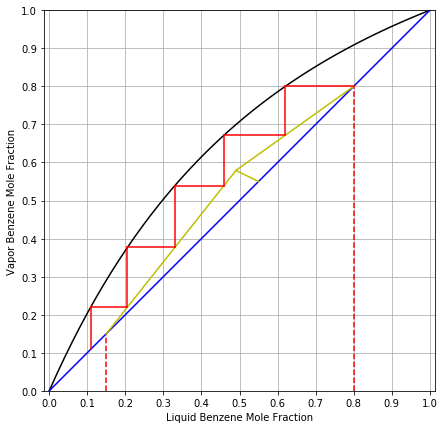

In [18]:
#intersection point data
x1=x_D #x-coordinate of right end of rectifying line
y1=x_D #y-coordinate of right end of rectifying line
xq1=z
yq1=z
xi=(q/(q-1)*xq1+y1-yq1-LoV3*x1)/(q/(q-1)-LoV3)
yi=LoV3*(xi-x1)+y1
print('x_i=',xi)
print('y_i=',yi)

#q-line data
xsq=np.array([xi,z],dtype='float64')
ysq=np.array([yi,z],dtype='float64')

#rectifying line data
xsr=np.array([xi,x_D],dtype='float64')
ysr=np.array([yi,x_D],dtype='float64')

#stripping line data
xss=np.array([x_B,xi],dtype='float64')
yss=np.array([x_B,yi],dtype='float64')

#defining step lines
#step 1
g1=np.interp(x_D,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h1=np.linspace(g1,x_D) #x values of horizontal line
a1_1=x_D*np.ones(len(h1)) #y values of horizontal line
y1v1=np.interp(g1,xsr,ysr) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v1=np.linspace(y1v1,x_D) #y values of vertical line
a1_2=g1*np.ones(len(v1)) #x values of vertical line
#step 2
g2=np.interp(y1v1,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h2=np.linspace(g2,g1) #x values of horizontal line
a2_1=y1v1*np.ones(len(h2)) #y values of horizontal line
y1v2=np.interp(g2,xss,yss) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v2=np.linspace(y1v2,y1v1) #y values of vertical line
a2_2=g2*np.ones(len(v2)) #x values of vertical line
#step 3
g3=np.interp(y1v2,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h3=np.linspace(g3,g2) #x values of horizontal line
a3_1=y1v2*np.ones(len(h3)) #y values of horizontal line
y1v3=np.interp(g3,xss,yss) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v3=np.linspace(y1v3,y1v2) #y values of vertical line
a3_2=g3*np.ones(len(v3)) #x values of vertical line
#step 4
g4=np.interp(y1v3,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h4=np.linspace(g4,g3) #x values of horizontal line
a4_1=y1v3*np.ones(len(h4)) #y values of horizontal line
y1v4=np.interp(g4,xss,yss) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v4=np.linspace(y1v4,y1v3) #y values of vertical line
a4_2=g4*np.ones(len(v4)) #x values of vertical line
#step 5
g5=np.interp(y1v4,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h5=np.linspace(g5,g4) #x values of horizontal line
a5_1=y1v4*np.ones(len(h5)) #y values of horizontal line
y1v5=g5
v5=np.linspace(y1v5,y1v4) #y values of vertical line
a5_2=g5*np.ones(len(v5)) #x values of vertical line

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting q-line
plt.plot(xsq,ysq,'y-')
#plotting rectifying line
plt.plot(xsr,ysr,'y-')
#plotting stripping line
plt.plot(xss,yss,'y-')
#plotting first step
plt.plot(h1,a1_1,'r-')
plt.plot(a1_2,v1,'r-')
#plotting second step
plt.plot(h2,a2_1,'r-')
plt.plot(a2_2,v2,'r-')
#plotting third step
plt.plot(h3,a3_1,'r-')
plt.plot(a3_2,v3,'r-')
#plotting fourth step
plt.plot(h4,a4_1,'r-')
plt.plot(a4_2,v4,'r-')
#plotting fifth step
plt.plot(h5,a5_1,'r-')
plt.plot(a5_2,v5,'r-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

print('x_B=',y1v5)

If 3 times the minimum reflux ratio is used, $\fbox{5 equilibrium stages}$ are required, and $\fbox{the feed stage should be located at stage 2}$